## Question 1: Load
Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found here

#### Please describe the structure of the data. Number of records and fields in each record?
There are 786363 transactions in the JSON data. It is list of dictionaries. There are a total of 786363 transaction records. For each record, there are 29 fields. 

#### Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.
1. There are 4562 missing data in acqCountry,724 in merchantCountryCode, 4054 in posEntryMode, 409 in posConditionCode, 698 in transactionType. There are no data for these 6 categories: echoBuffer, merchantCity, merchantState, merchantZip, posOnPremises, recurringAuthInd.

3. The range for creditLimit is from 250 to 50000. The range for availableMoney	is from -1005.63 to 50000. The range for transactionAmount is from 0 to 2011.54. The range for currentBalance is from 0 to 47498.81.

2. There are a total of 5000 unique customer ID in this dataset. For these customers, there are a total of 4 countries recorded (not including NA). There are 19 merchantCategoryCode types, and 3 different transaction types (not including NA).


## Question 2: Plot
#### Plot a histogram of the processed amounts of each transaction, the transactionAmount column.
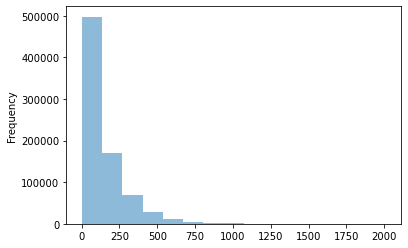
(histgram for amount of transaction)
#### Report any structure you find and any hypotheses you have about that structure.
Exponential decay.
Number of transations decrease exponentially as the transaction amount increases




## Question 3: Data Wrangling - Duplicate Transactions
You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

#### Can you programmatically identify reversed and multi-swipe transactions?
Reversed transactions are recorded in reverse_df. They are identified as they have transactionType 'REVERSAL'.

Multi-swipe transactions are recorded in Multi_df_f2. They are identified as  multiple trasaction of the same amount, same customer, same merchant, within 2 minutes.

#### What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)
There are a total of 20303 reversed transactions. The total amount  for the reversed transactions is 2821792.5.

There are a total of 666 multi-swipe transactions. The total amount  for the multi-swipe transactions is 40266.25.

#### Did you find anything interesting about either kind of transaction?
There are a total of 19 type of merchant_Category. Online retail are the merchant_Category that most subject to mistakes.

For reversed transactions, there are only 13 types involved. The most common type is online retail (28%) and fastfood (16%). There are no following type of reversed transcation: 'cable/phone', 'food_delivery', 'fuel', 'gym', 'mobileapps', 'online_subscriptions'. Also, there are higher propotion of transaction in the range of 0-200 compard to that of multi-swipe.




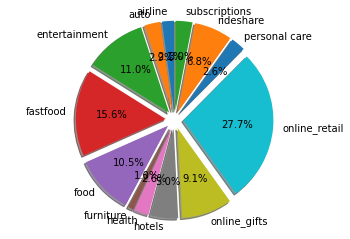
(Reversed Transactions Pie Chart)


For multi-swipe transactions, all 19 types involved. The most common type is online mobileApps (24%) and online subscription (17%). The two most common type are both online payments.



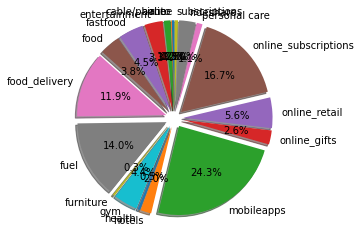
(Multi-swipe Transactions Pie Chart)




## Question 4: Model
Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.

Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).


#### Provide an estimate of performance using an appropriate sample, and show your work.
Because a very small proportion of data is positive,  I used AUCROC score to evaluate the performance. The data use split at 0.8/0.2 for training/test. Comparing the performace of SVC, Random forest, logistic regression, adaboost and xgboost, it is found that xgboost gives the best AUC of 0.99. The accuracy of xgboost is also the highest among algorithms.

#### Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)
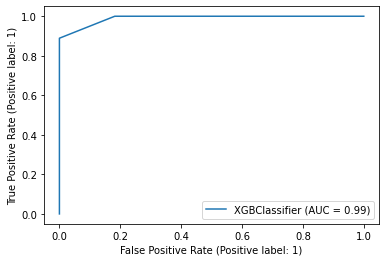
(AUC for xgboost)
1. Since this is a binary prediction for fraud, I used binary Classification models including SVC, Random forest  logistic regression, adaboost and xgboost, it is found that xgboost gives both the best AUC score of 0.99 and the best accuracy of 0.95.

2. Using a parameter analysis on feature importance,the creditLimit data was excluded due to low feature importance. Some of the top important features are: merchantCountryCode_US, cardPresent_True, merchantCategoryCode_online_retail. The following variable is included: 'availableMoney','transactionDateTime' (transformed to months and hours), 'merchantCountryCode', 'transactionAmount', 'merchantCategoryCode', 'transactionType', 'currentBalance', 'cardPresent', 'expirationDateKeyInMatch', 'isFraud'





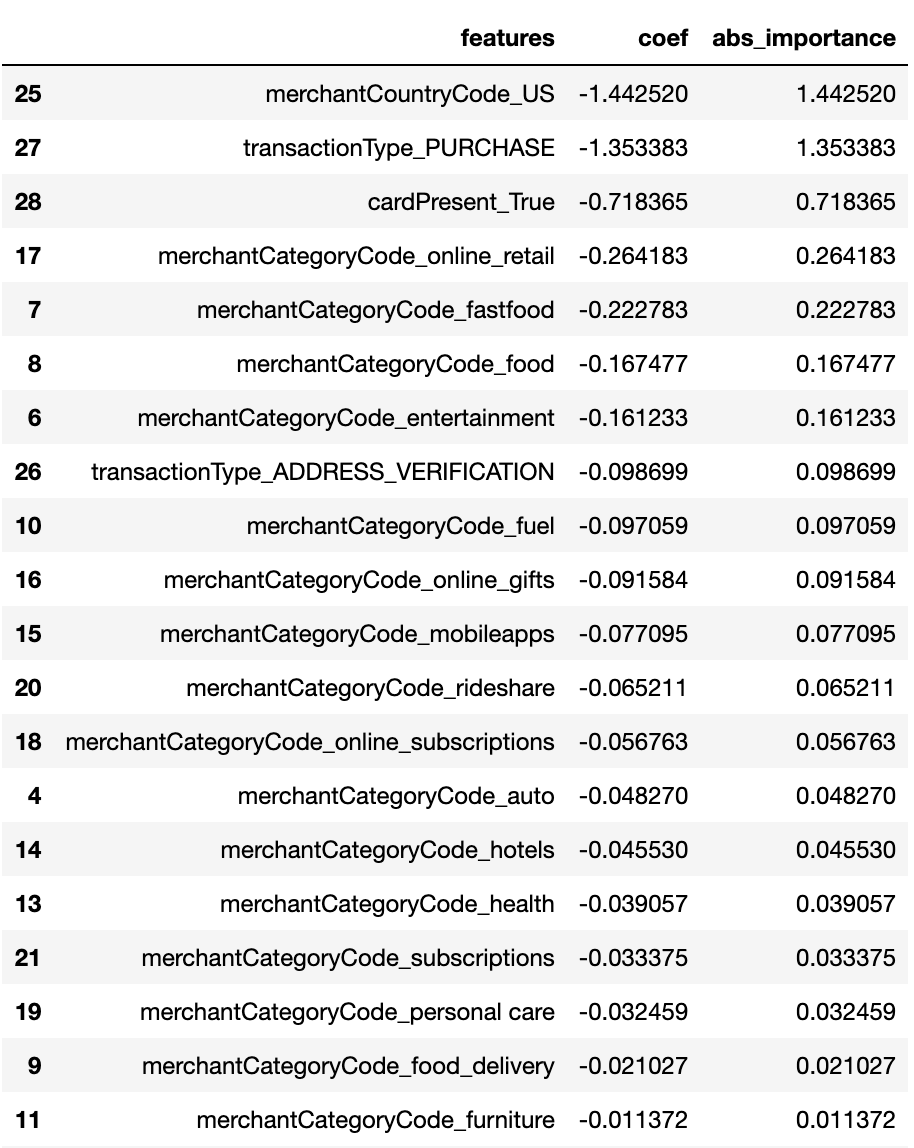

(list of feature importance)


3. Because there are much more non-fraud cases compared to fraud cases, the more abundant categories seem to have a greater negative impact. A more balanced dataset, i.e a greater proportion of fraud cases included, may change the feature importance and increase prediction rate. 

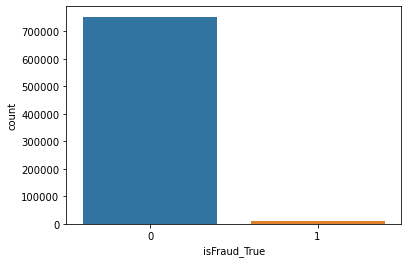

(bar graph of total number of NotFraud and Fraud cases)


4. If given more time, I wish to perform clustering analysis to cluster customers into groups by features, and see if each groups have different fraud rate and prediction accuracy. 

# Code

In [1]:
import json
import pandas as pd 
import numpy as np
import datetime as dt

In [2]:
transactions = []
for line in open('transactions.json', 'r'):
    transactions.append(json.loads(line))

In [3]:
transactions[0:3]

[{'accountNumber': '737265056',
  'customerId': '737265056',
  'creditLimit': 5000.0,
  'availableMoney': 5000.0,
  'transactionDateTime': '2016-08-13T14:27:32',
  'transactionAmount': 98.55,
  'merchantName': 'Uber',
  'acqCountry': 'US',
  'merchantCountryCode': 'US',
  'posEntryMode': '02',
  'posConditionCode': '01',
  'merchantCategoryCode': 'rideshare',
  'currentExpDate': '06/2023',
  'accountOpenDate': '2015-03-14',
  'dateOfLastAddressChange': '2015-03-14',
  'cardCVV': '414',
  'enteredCVV': '414',
  'cardLast4Digits': '1803',
  'transactionType': 'PURCHASE',
  'echoBuffer': '',
  'currentBalance': 0.0,
  'merchantCity': '',
  'merchantState': '',
  'merchantZip': '',
  'cardPresent': False,
  'posOnPremises': '',
  'recurringAuthInd': '',
  'expirationDateKeyInMatch': False,
  'isFraud': False},
 {'accountNumber': '737265056',
  'customerId': '737265056',
  'creditLimit': 5000.0,
  'availableMoney': 5000.0,
  'transactionDateTime': '2016-10-11T05:05:54',
  'transactionAmount

In [4]:
len(transactions)

786363

In [5]:
print(len(transactions[1].keys()))

29


In [6]:
df = pd.DataFrame(transactions) 

In [7]:
df.head(20)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.00,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.00,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.00,,,,True,,,False,False
5,830329091,830329091,5000.0,5000.00,2016-04-19T16:24:27,30.76,In-N-Out #422833,US,US,02,...,,0.00,,,,True,,,False,False
6,830329091,830329091,5000.0,5000.00,2016-05-21T14:50:35,57.28,Krispy Kreme #685312,US,US,02,...,,0.00,,,,True,,,False,False
7,830329091,830329091,5000.0,5000.00,2016-06-03T00:31:21,9.37,Shake Shack #968081,US,US,05,...,,0.00,,,,True,,,False,False
8,830329091,830329091,5000.0,4990.63,2016-06-10T01:21:46,523.67,Burger King #486122,,US,02,...,,9.37,,,,True,,,False,False
9,830329091,830329091,5000.0,5000.00,2016-07-11T10:47:16,164.37,Five Guys #510989,US,US,05,...,,0.00,,,,True,,,False,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  object 
 1   customerId                786363 non-null  object 
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [9]:
df.describe()

,creditLimit,availableMoney,transactionAmount,currentBalance
count,786363.000000,786363.000000,786363.000000,786363.000000
mean,10759.464459,6250.725369,136.985791,4508.739089
std,11636.174890,8880.783989,147.725569,6457.442068
min,250.000000,-1005.630000,0.000000,0.000000
25%,5000.000000,1077.420000,33.650000,689.910000
50%,7500.000000,3184.860000,87.900000,2451.760000
75%,15000.000000,7500.000000,191.480000,5291.095000
max,50000.000000,50000.000000,2011.540000,47498.810000


In [10]:
#check duplicates
len(df)-len(df.drop_duplicates())

0

In [11]:
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [123]:
#check for unique values
df.nunique()

accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              521916
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       5
merchantCountryCode              5
posEntryMode                     6
posConditionCode                 4
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5246
transactionType                  4
echoBuffer                       1
currentBalance              487318
merchantCity                     1
merchantState                    1
merchantZip                      1
cardPresent                      2
posOnPremises                    1
recurringAuthInd                 1
expirationDateKeyInMatch         2
isFraud             

In [13]:
df.posConditionCode.unique()

array(['01', '08', '99', ''], dtype=object)

In [14]:
df.posEntryMode.unique()

array(['02', '09', '05', '80', '90', ''], dtype=object)

In [15]:
df.transactionType.unique()

array(['PURCHASE', 'ADDRESS_VERIFICATION', 'REVERSAL', ''], dtype=object)

In [16]:
df2=df.copy()
df2.acqCountry[8]
df2=df2.replace('', np.nan)
df2.acqCountry[8]

nan

In [17]:
#check for null
df2.isna().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

In [18]:
df2.columns
#df2=df2.loc[:,['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
#       'transactionDateTime', 'transactionAmount', 'merchantName',
#       'acqCountry', 'merchantCountryCode', 
#       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
#       'dateOfLastAddressChange', 
#       'transactionType',  'currentBalance', 'cardPresent', 'expirationDateKeyInMatch', 'isFraud']]

df2=df2.loc[:,['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 
       'acqCountry', 'merchantCountryCode', 
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 
       'transactionType',  'currentBalance', 'cardPresent', 'expirationDateKeyInMatch', 'isFraud']]
df2.head(50)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,acqCountry,merchantCountryCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,US,US,rideshare,06/2023,2015-03-14,2015-03-14,414,414,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,US,US,entertainment,02/2024,2015-03-14,2015-03-14,486,486,PURCHASE,0.00,True,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,US,US,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,US,US,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,PURCHASE,0.00,False,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,US,US,fastfood,10/2029,2015-08-06,2015-08-06,885,885,PURCHASE,0.00,True,False,False
5,830329091,830329091,5000.0,5000.00,2016-04-19T16:24:27,30.76,US,US,fastfood,01/2020,2015-08-06,2015-08-06,885,885,PURCHASE,0.00,True,False,False
6,830329091,830329091,5000.0,5000.00,2016-05-21T14:50:35,57.28,US,US,fastfood,05/2020,2015-08-06,2015-08-06,885,885,PURCHASE,0.00,True,False,False
7,830329091,830329091,5000.0,5000.00,2016-06-03T00:31:21,9.37,US,US,fastfood,01/2021,2015-08-06,2015-08-06,885,885,PURCHASE,0.00,True,False,False
8,830329091,830329091,5000.0,4990.63,2016-06-10T01:21:46,523.67,NaN,US,fastfood,08/2032,2015-08-06,2015-08-06,885,885,PURCHASE,9.37,True,False,False
9,830329091,830329091,5000.0,5000.00,2016-07-11T10:47:16,164.37,US,US,fastfood,04/2020,2015-08-06,2015-08-06,885,885,PURCHASE,0.00,True,False,False


In [19]:
df.describe()

,creditLimit,availableMoney,transactionAmount,currentBalance
count,786363.000000,786363.000000,786363.000000,786363.000000
mean,10759.464459,6250.725369,136.985791,4508.739089
std,11636.174890,8880.783989,147.725569,6457.442068
min,250.000000,-1005.630000,0.000000,0.000000
25%,5000.000000,1077.420000,33.650000,689.910000
50%,7500.000000,3184.860000,87.900000,2451.760000
75%,15000.000000,7500.000000,191.480000,5291.095000
max,50000.000000,50000.000000,2011.540000,47498.810000


## Question 1: Load
Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found here

#### Please describe the structure of the data. Number of records and fields in each record?
There are 786363 transactions in the JSON data. It is list of dictionaries. There are a total of 786363 transaction records. For each record, there are 29 fields.

#### Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.
1. There are 4562 missing data in acqCountry,724 in merchantCountryCode, 4054 in posEntryMode, 409 in posConditionCode, 698 in transactionType. There are no data for these 6 categories: echoBuffer, merchantCity, merchantState, merchantZip, posOnPremises, recurringAuthInd.

3. The range for creditLimit is from 250 to 50000. The range for availableMoney	is from -1005.63 to 50000. The range for transactionAmount is from 0 to 2011.54. The range for currentBalance is from 0 to 47498.81.

2. There are a total of 5000 unique customer ID in this dataset. For these customers, there are a total of 5 countries recorded.


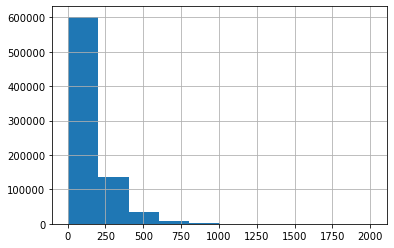

In [22]:
hist = df.transactionAmount.hist(bins=10)

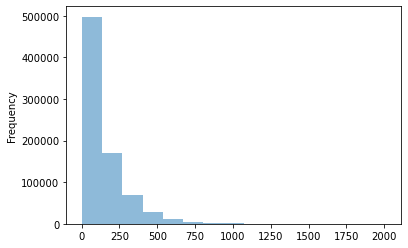

In [23]:
ax = df.transactionAmount.plot.hist(bins=15, alpha=0.5)

## Question 2: Plot
#### Plot a histogram of the processed amounts of each transaction, the transactionAmount column.
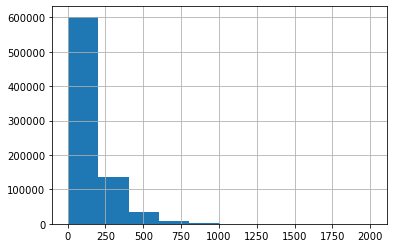
#### Report any structure you find and any hypotheses you have about that structure.
Exponential decay.

Number of transations decrease exponentially as the transaction amount increases

In [24]:
# identification of reverse transaction : 
id=df[df.transactionType=='REVERSAL'].index
reverse_df=df2.iloc[id,:]
reverse_df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,acqCountry,merchantCountryCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
39,574788567,574788567,2500.0,2200.98,2016-05-24T01:38:03,215.13,US,US,auto,10/2021,2015-10-13,2015-10-13,206,206,REVERSAL,299.02,True,False,False
73,574788567,574788567,2500.0,2432.72,2016-10-07T10:23:57,3.87,US,US,auto,10/2022,2015-10-13,2015-10-13,579,579,REVERSAL,67.28,True,False,False
101,924729945,924729945,50000.0,49831.43,2016-10-19T14:01:45,168.57,US,US,online_retail,11/2024,2014-07-25,2014-07-25,205,265,REVERSAL,168.57,False,False,False
133,984504651,984504651,50000.0,46367.41,2016-01-16T09:53:15,450.74,US,US,health,08/2028,2015-07-27,2015-07-27,640,640,REVERSAL,3632.59,False,False,False
156,984504651,984504651,50000.0,41909.30,2016-01-25T20:39:15,81.73,US,US,entertainment,12/2031,2015-07-27,2015-07-27,640,640,REVERSAL,8090.70,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786106,899818521,899818521,2500.0,968.33,2016-09-29T02:04:32,10.05,US,US,online_retail,02/2031,2013-06-15,2013-06-15,421,421,REVERSAL,1531.67,False,False,False
786120,638498773,638498773,10000.0,9798.21,2016-01-01T19:48:03,201.79,US,US,fastfood,11/2032,2014-11-17,2014-11-17,175,175,REVERSAL,201.79,True,False,False
786219,638498773,638498773,10000.0,5331.33,2016-11-03T04:23:26,86.14,US,US,fastfood,03/2025,2014-11-17,2014-11-17,387,387,REVERSAL,4668.67,True,False,False
786225,638498773,638498773,10000.0,4393.10,2016-11-06T22:54:25,49.39,US,US,fastfood,06/2029,2014-11-17,2014-11-17,387,387,REVERSAL,5606.90,True,False,False


In [25]:
reverse_df.shape

(20303, 19)

In [26]:
reverse_df.transactionAmount.sum()

2821792.5

In [27]:
from datetime import datetime

In [34]:
df2['transactionDateTime']=pd.to_datetime(df2['transactionDateTime'],format='%Y-%m-%dT%H:%M:%S')

In [35]:
df2['transactionDateTime']

0        2016-08-13 14:27:32
1        2016-10-11 05:05:54
2        2016-11-08 09:18:39
3        2016-12-10 02:14:50
4        2016-03-24 21:04:46
                 ...        
786358   2016-12-22 18:44:12
786359   2016-12-25 16:20:34
786360   2016-12-27 15:46:24
786361   2016-12-29 00:30:55
786362   2016-12-30 20:10:29
Name: transactionDateTime, Length: 786363, dtype: datetime64[ns]

In [36]:
customers = df.customerId.unique()

In [37]:
# initialize dataframe
Multi_df=df2.iloc[1:2,:]  #all multi-swipe transaction
Multi_df2=df2.iloc[1:2,:] #multi-swipe transactions exclude the 1st normal payment
type(Multi_df)
Multi_df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,acqCountry,merchantCountryCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
1,737265056,737265056,5000.0,5000.0,2016-10-11 05:05:54,74.51,US,US,entertainment,02/2024,2015-03-14,2015-03-14,486,486,PURCHASE,0.0,True,False,False


In [38]:
# multiple swipe: multiple trasaction of the same amount, same customer, same merchant, within 2 minutes
for customer in customers:
    df_cus=df2[df2.customerId==customer]
    for i in range(df_cus.shape[0]-1):
        dff=df2['transactionDateTime'][i+1]-df2['transactionDateTime'][i] 
        diff=dff.total_seconds()
        if df_cus.iloc[i,5]==df_cus.iloc[i+1,5] and df_cus.iloc[i,6]==df_cus.iloc[i+1,6] and diff <=120 and df_cus.iloc[i+1,14]=='PURCHASE':
            Multi_df=Multi_df.append(df_cus.iloc[i,:])
            Multi_df=Multi_df.append(df_cus.iloc[i+1,:])
            Multi_df2=Multi_df2.append(df_cus.iloc[i+1,:]) #multi-swipe transactions exclude the 1st normal payment
        


In [41]:
Multi_df_f=Multi_df.copy()
Multi_df_f=Multi_df_f.drop(1)

In [42]:
#all multi-swipe transaction
Multi_df_f.head(20)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,acqCountry,merchantCountryCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
3068,101380713,101380713,10000.0,2407.85,2016-11-17 14:32:54,407.67,US,US,rideshare,12/2019,2015-06-01,2016-08-28,551,551,PURCHASE,7592.15,False,False,False
3069,101380713,101380713,10000.0,2000.18,2016-11-17 14:35:32,407.67,US,US,rideshare,12/2019,2015-06-01,2016-08-28,551,551,PURCHASE,7999.82,False,False,False
3891,419989841,419989841,5000.0,831.15,2016-03-04 21:26:00,313.59,US,US,online_retail,07/2031,2015-03-05,2015-03-05,209,209,PURCHASE,4168.85,False,False,False
3892,419989841,419989841,5000.0,517.56,2016-03-04 21:26:53,313.59,US,US,online_retail,07/2031,2015-03-05,2015-03-05,209,209,PURCHASE,4482.44,False,False,False
4400,281639186,281639186,2500.0,2477.27,2016-06-11 21:55:24,7.07,US,US,mobileapps,06/2021,2012-12-23,2012-12-23,788,688,PURCHASE,22.73,False,False,False
4401,281639186,281639186,2500.0,2495.20,2016-07-13 01:22:56,7.07,US,US,mobileapps,06/2021,2012-12-23,2012-12-23,788,688,PURCHASE,4.80,False,False,False
4649,245118458,245118458,15000.0,15000.00,2016-07-04 21:34:49,78.79,US,US,food,02/2020,2015-11-19,2015-11-19,161,161,PURCHASE,0.00,True,False,False
4650,245118458,245118458,15000.0,14921.21,2016-07-04 21:37:14,78.79,US,US,food,02/2020,2015-11-19,2015-11-19,161,161,PURCHASE,78.79,True,False,False
4902,288118894,288118894,7500.0,7476.05,2016-04-08 02:48:38,7.39,US,US,mobileapps,10/2029,2014-09-17,2014-09-17,665,665,PURCHASE,23.95,False,False,False
4903,288118894,288118894,7500.0,7493.66,2016-05-08 08:13:42,7.39,US,US,mobileapps,10/2029,2014-09-17,2014-09-17,665,665,PURCHASE,6.34,False,False,False


In [43]:
Multi_df_f.shape

(1332, 19)

In [44]:
Multi_df_f2=Multi_df2.copy()
Multi_df_f2=Multi_df_f2.drop(1)

In [45]:
#multi-swipe transactions exclude the 1st normal payment
Multi_df_f2.shape

(666, 19)

In [46]:
Multi_df_f2.head(50)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,acqCountry,merchantCountryCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
3069,101380713,101380713,10000.0,2000.18,2016-11-17 14:35:32,407.67,US,US,rideshare,12/2019,2015-06-01,2016-08-28,551,551,PURCHASE,7999.82,False,False,False
3892,419989841,419989841,5000.0,517.56,2016-03-04 21:26:53,313.59,US,US,online_retail,07/2031,2015-03-05,2015-03-05,209,209,PURCHASE,4482.44,False,False,False
4401,281639186,281639186,2500.0,2495.20,2016-07-13 01:22:56,7.07,US,US,mobileapps,06/2021,2012-12-23,2012-12-23,788,688,PURCHASE,4.80,False,False,False
4650,245118458,245118458,15000.0,14921.21,2016-07-04 21:37:14,78.79,US,US,food,02/2020,2015-11-19,2015-11-19,161,161,PURCHASE,78.79,True,False,False
4903,288118894,288118894,7500.0,7493.66,2016-05-08 08:13:42,7.39,US,US,mobileapps,10/2029,2014-09-17,2014-09-17,665,665,PURCHASE,6.34,False,False,False
5041,988172671,988172671,250.0,189.28,2016-12-16 05:47:41,23.77,US,US,fuel,03/2028,2014-09-27,2014-09-27,798,798,PURCHASE,60.72,True,False,False
5632,935981871,935981871,5000.0,4914.29,2016-05-06 19:09:23,8.08,US,US,mobileapps,02/2025,2014-06-04,2014-06-04,128,128,PURCHASE,85.71,False,False,False
6690,996362843,996362843,1000.0,878.66,2016-03-04 23:22:29,98.37,US,US,fastfood,01/2025,2012-10-14,2012-10-14,367,367,PURCHASE,121.34,True,False,False
8098,687365478,687365478,10000.0,10000.00,2016-10-16 11:09:02,0.00,US,US,fuel,07/2024,2015-01-26,2015-01-26,939,939,PURCHASE,0.00,False,False,False
9360,717714059,717714059,15000.0,14964.06,2016-10-22 00:01:37,35.94,US,US,fuel,08/2024,2015-04-30,2015-04-30,670,670,PURCHASE,35.94,True,False,False


In [47]:
Multi_df_f2.transactionAmount.sum()

40266.25

In [48]:
Multi_df_f2.merchantCategoryCode.unique()

array(['rideshare', 'online_retail', 'mobileapps', 'food', 'fuel',
       'fastfood', 'furniture', 'entertainment', 'food_delivery',
       'hotels', 'health', 'online_subscriptions', 'personal care',
       'airline', 'gym', 'subscriptions', 'cable/phone', 'online_gifts',
       'auto'], dtype=object)

In [49]:
# Check for merchantCategoryCode in diffrent transactions
all_pie=df2.groupby(by=["merchantCategoryCode"])["merchantCategoryCode"].count()
reverse_pie=reverse_df.groupby(by=["merchantCategoryCode"])["merchantCategoryCode"].count()
multi_pie=Multi_df_f2.groupby(by=["merchantCategoryCode"])["merchantCategoryCode"].count()

print(len(all_pie))
print(len(reverse_pie))
print(len(multi_pie))


19
13
19


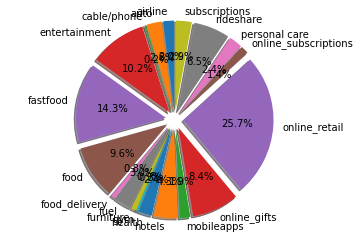

In [50]:
import matplotlib.pyplot as plt
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# Check for merchantCategoryCode in all transactions
labels = all_pie.index
sizes = all_pie.values
explode = (0.1,   0.1,   0.1,  0.1,  0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,  0.1, 0.1,0.1,0.1,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

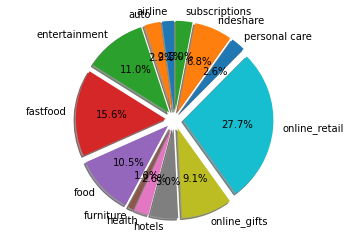

In [51]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# Check for merchantCategoryCode in reversed transactions
labels = reverse_pie.index
sizes = reverse_pie.values
explode = (0.1,   0.1,   0.1,  0.1,  0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

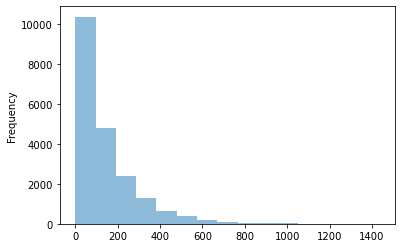

In [52]:
#check distribution of transaction amount in reveresd transaction
ax = reverse_df.transactionAmount.plot.hist(bins=15, alpha=0.5)

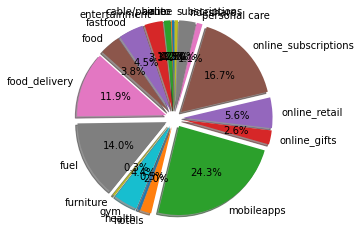

In [53]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# Check for merchantCategoryCode in multi-swiped transactions
labels = multi_pie.index
sizes = multi_pie.values
explode = (0.1,   0.1,   0.1,  0.1,  0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,
        0.1,  0.1, 0.1,0.1,0.1,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

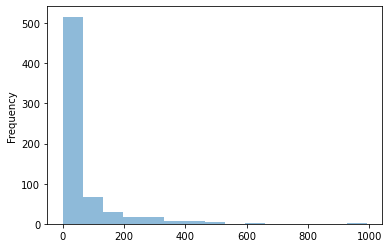

In [54]:
#check distribution of transaction amount in multiswiped transaction

ax = Multi_df_f2.transactionAmount.plot.hist(bins=15, alpha=0.5)

In [55]:
sorted(multi_pie.index)

['airline',
 'auto',
 'cable/phone',
 'entertainment',
 'fastfood',
 'food',
 'food_delivery',
 'fuel',
 'furniture',
 'gym',
 'health',
 'hotels',
 'mobileapps',
 'online_gifts',
 'online_retail',
 'online_subscriptions',
 'personal care',
 'rideshare',
 'subscriptions']

In [56]:
sorted(reverse_pie.index)

['airline',
 'auto',
 'entertainment',
 'fastfood',
 'food',
 'furniture',
 'health',
 'hotels',
 'online_gifts',
 'online_retail',
 'personal care',
 'rideshare',
 'subscriptions']

In [57]:
Rev_id=reverse_df.index
Rev_id
Multi_id=Multi_df_f2.index
Multi_id
bad_id=Rev_id.append(Multi_id)

In [58]:
df_clean=df2.drop(bad_id)
df_clean.shape

(765394, 19)

## Question 3: Data Wrangling - Duplicate Transactions
You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

#### Can you programmatically identify reversed and multi-swipe transactions?
Reversed transactions are recorded in reverse_df. They are identified as they have transactionType 'REVERSAL'.

Multi-swipe transactions are recorded in Multi_df_f2. They are identified as  multiple trasaction of the same amount, same customer, same merchant, within 2 minutes.

#### What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)
There are a total of 20303 reversed transactions. The total amount  for the reversed transactions is 2821792.5.

There are a total of 666 multi-swipe transactions. The total amount  for the multi-swipe transactions is 40266.25.

#### Did you find anything interesting about either kind of transaction?
There are a total of 19 type of merchant_Category. Online retail are the merchant_Category that most subject to mistakes.

For reversed transactions, there are only 13 types involved. The most common type is online retail (28%) and fastfood (16%). There are no following type of reversed transcation: 'cable/phone', 'food_delivery', 'fuel', 'gym', 'mobileapps', 'online_subscriptions'. Also, there are higher propotion of transaction in the range of 0-200 compard to that of multi-swipe.

For multi-swipe transactions, all 19 types involved. The most common type is online mobileApps (24%) and online subscription (17%). The two most common type are both online payments.


In [59]:
#get rid of unwanted/empty columns
df_clean.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,acqCountry,merchantCountryCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13 14:27:32,98.55,US,US,rideshare,06/2023,2015-03-14,2015-03-14,414,414,PURCHASE,0.0,False,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11 05:05:54,74.51,US,US,entertainment,02/2024,2015-03-14,2015-03-14,486,486,PURCHASE,0.0,True,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08 09:18:39,7.47,US,US,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,PURCHASE,0.0,False,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10 02:14:50,7.47,US,US,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,PURCHASE,0.0,False,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24 21:04:46,71.18,US,US,fastfood,10/2029,2015-08-06,2015-08-06,885,885,PURCHASE,0.0,True,False,False


In [60]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765394 entries, 0 to 786362
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             765394 non-null  object        
 1   customerId                765394 non-null  object        
 2   creditLimit               765394 non-null  float64       
 3   availableMoney            765394 non-null  float64       
 4   transactionDateTime       765394 non-null  datetime64[ns]
 5   transactionAmount         765394 non-null  float64       
 6   acqCountry                760958 non-null  object        
 7   merchantCountryCode       764690 non-null  object        
 8   merchantCategoryCode      765394 non-null  object        
 9   currentExpDate            765394 non-null  object        
 10  accountOpenDate           765394 non-null  object        
 11  dateOfLastAddressChange   765394 non-null  object        
 12  ca

In [101]:
#get rid of unwanted/empty columns based on later analysis

df_model=df_clean[[#'creditLimit',
                   'availableMoney',
                   #'transactionDateTime',
                   'merchantCountryCode',
                   'transactionAmount',
                   'merchantCategoryCode','transactionType'
                  ,'currentBalance','cardPresent','expirationDateKeyInMatch','isFraud']]

In [102]:
#df_model['currentExpDate']=pd.to_datetime(df_model['currentExpDate'],format='%m/%Y')
#df_model.dateOfLastAddressChange=pd.to_datetime(df_model['dateOfLastAddressChange'],format='%Y-%m-%d')
#df_model.accountOpenDate=pd.to_datetime(df_model['accountOpenDate'],format='%Y-%m-%d')

In [62]:
## I was going to check if months and hour affect the fraud, but turns out these does not improve the prediction 
## but increased computation significantly.


#df_model['month']=0
#df_model['hour']=0
#for i in range(df_model.shape[0]):
#    dt=df_model.iloc[i,2]
#    df_model['month']= dt.month
#    df_model['hour']= dt.hour

<ipython-input-62-679d9187439d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['month']=0
<ipython-input-62-679d9187439d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['hour']=0
<ipython-input-62-679d9187439d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [103]:
#df_model.month=df_model.month.astype(str)
#df_model.hour=df_model.hour.astype(str)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765394 entries, 0 to 786362
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   availableMoney            765394 non-null  float64
 1   merchantCountryCode       764690 non-null  object 
 2   transactionAmount         765394 non-null  float64
 3   merchantCategoryCode      765394 non-null  object 
 4   transactionType           764696 non-null  object 
 5   currentBalance            765394 non-null  float64
 6   cardPresent               765394 non-null  bool   
 7   expirationDateKeyInMatch  765394 non-null  bool   
 8   isFraud                   765394 non-null  bool   
dtypes: bool(3), float64(3), object(3)
memory usage: 59.2+ MB


In [104]:
# creating a copy of the original data frame
df3 = df_model.copy()
  
# calling the get_dummies method returns the dummies for all categorical columns
df3 = pd.get_dummies(df_model,
                     columns = ['merchantCategoryCode','merchantCountryCode', 'transactionType','cardPresent','expirationDateKeyInMatch','isFraud'])
df3=df3.drop(['cardPresent_False','expirationDateKeyInMatch_False','isFraud_False'], axis=1)  
display(df3)

,availableMoney,transactionAmount,currentBalance,merchantCategoryCode_airline,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,...,merchantCategoryCode_subscriptions,merchantCountryCode_CAN,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,cardPresent_True,expirationDateKeyInMatch_True,isFraud_True
0,5000.00,98.55,0.00,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,5000.00,74.51,0.00,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
2,5000.00,7.47,0.00,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,5000.00,7.47,0.00,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,5000.00,71.18,0.00,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,48904.96,119.92,1095.04,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
786359,48785.04,18.89,1214.96,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
786360,48766.15,49.43,1233.85,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
786361,48716.72,49.89,1283.28,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [105]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

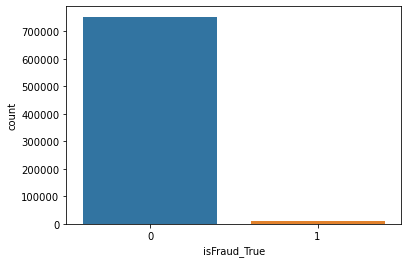

In [106]:
#check the fraud outcome distribution
import seaborn as sns
ax=sns.countplot(x=df3['isFraud_True'])
plt.show()

#### Logistic regression to check importance of parameters

In [107]:
# define dataset        
#y = df['incident_diabetes'][0:500]
y = df3['isFraud_True']
#X=ndf.values[0:500,]
#X=ndf.iloc[0:500,]
X=df3.drop(['isFraud_True'],axis=1)
print(len(y))
X.shape

765394


(765394, 30)

In [108]:
# define the model
model = LogisticRegression()
# fit the model
res=model.fit(X, y)

In [109]:
# get importance
importance = model.coef_[0]

In [110]:
FeatureImportance=pd.DataFrame(zip(X.columns,np.transpose(model.coef_.tolist()[0])),columns=['features','coef'])
FeatureImportance['abs_importance']=abs(FeatureImportance.coef)
FeatureImportance.sort_values(by=['abs_importance'],ascending=False)

,features,coef,abs_importance
25,merchantCountryCode_US,-1.442520,1.442520
27,transactionType_PURCHASE,-1.353383,1.353383
28,cardPresent_True,-0.718365,0.718365
17,merchantCategoryCode_online_retail,-0.264183,0.264183
7,merchantCategoryCode_fastfood,-0.222783,0.222783
8,merchantCategoryCode_food,-0.167477,0.167477
6,merchantCategoryCode_entertainment,-0.161233,0.161233
26,transactionType_ADDRESS_VERIFICATION,-0.098699,0.098699
10,merchantCategoryCode_fuel,-0.097059,0.097059
16,merchantCategoryCode_online_gifts,-0.091584,0.091584


#### ML prediction

In [111]:
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc,recall_score,precision_score,roc_auc_score,accuracy_score,mean_squared_error

/Users/ziye/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ziye/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:28:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:28:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


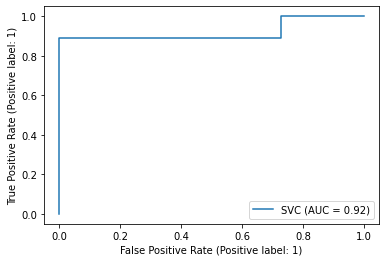

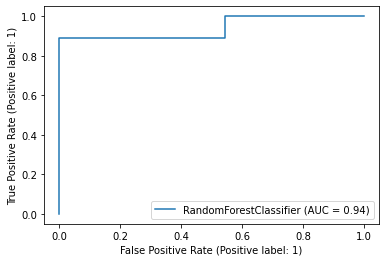

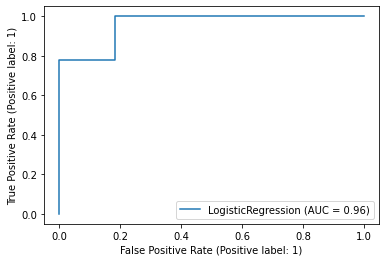

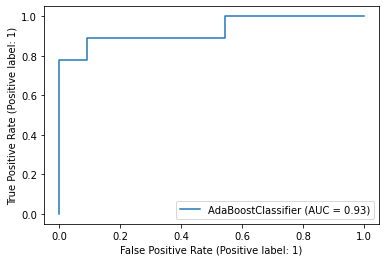

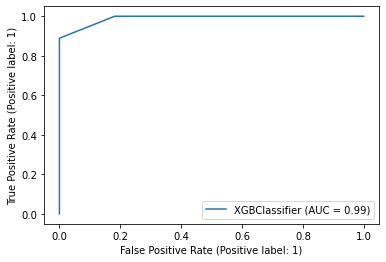

In [112]:
#use multiple ml algorithms for model fitting
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier

X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svc = SVC(random_state=42)
svc.fit(X_train, y_train)
#rfc = RandomForestClassifier(random_state=42)
rfc = RandomForestClassifier(max_depth=6, random_state=42)
rfc.fit(X_train, y_train)
logreg=LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
xg_reg = xgb.XGBClassifier(random_state=42)
xg_reg.fit(X_train, y_train)
adareg=AdaBoostClassifier(n_estimators=100,
                         learning_rate=0.5,random_state=42)
adareg.fit(X_train, y_train)
#xg_reg = xgb.XGBClassifier(random_state=42)
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.1, learning_rate = 0.1,
                max_depth = 25, alpha = 10, n_estimators = 300,booster='gbtree')
xg_reg.fit(X_train, y_train)


svc_disp = plot_roc_curve(svc, X_test, y_test)
rfc_disp = plot_roc_curve(rfc, X_test, y_test)
logreg_disp = plot_roc_curve(logreg, X_test, y_test)
adareg_disp = plot_roc_curve(adareg, X_test, y_test)
xgbreg_disp = plot_roc_curve(xg_reg, X_test, y_test)
#xgb_disp.figure_.suptitle("ROC curve comparison")

plt.show()

In [120]:
svcpreds = svc.predict(X_test)
accuracy=accuracy_score(y_test,svcpreds)
print('The accuracy for SVC is {}'.format(accuracy))

rfcpreds = rfc.predict(X_test)
accuracy=accuracy_score(y_test,rfcpreds)
print('The accuracy for random forest is {}'.format(accuracy))

logregpreds = logreg.predict(X_test)
accuracy=accuracy_score(y_test,logregpreds)
print('The accuracy for logistic regression is {}'.format(accuracy))

adapreds = adareg.predict(X_test)
accuracy=accuracy_score(y_test,adapreds)
print('The accuracy for ada boost is {}'.format(accuracy))

xgpreds = xg_reg.predict(X_test)
accuracy=accuracy_score(y_test,xgpreds)
print('The accuracy for xgboost is {}'.format(accuracy))

The accuracy for SVC is 0.9
The accuracy for random forest is 0.95
The accuracy for logistic regression is 0.8
The accuracy for ada boost is 0.9
The accuracy for xgboost is 0.95


## Question 4: Model
Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.

Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).


#### Provide an estimate of performance using an appropriate sample, and show your work.
Because a very small proportion of data is positive,  I used AUCROC score to evaluate the performance. The data use split at 0.8/0.2 for training/test. Comparing the performace of SVC, Random forest, logistic regression, adaboost and xgboost, it is found that xgboost gives the best AUC of 0.99. The accuracy of xgboost is also the highest among algorithms.

#### Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)
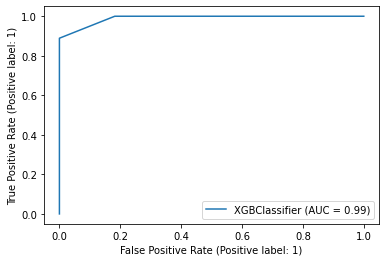
1. Since this is a binary prediction for fraud, I used binary Classification models including SVC, Random forest  logistic regression, adaboost and xgboost, it is found that xgboost gives both the best AUC score of 0.99 and the best accuracy of 0.95.

2. Using a parameter analysis on feature importance,the creditLimit data was excluded due to low feature importance. Some of the top important features are: merchantCountryCode_US, cardPresent_True, merchantCategoryCode_online_retail. The following variable is included: 'availableMoney','transactionDateTime' (transformed to months and hours), 'merchantCountryCode', 'transactionAmount', 'merchantCategoryCode', 'transactionType', 'currentBalance', 'cardPresent', 'expirationDateKeyInMatch', 'isFraud'

3. Because there are much more non-fraud cases compared to fraud cases, the more abundant categories seem to have a greater negative impact. A more balanced dataset, i.e a greater proportion of fraud cases included, may change the feature importance and increase prediction rate. 
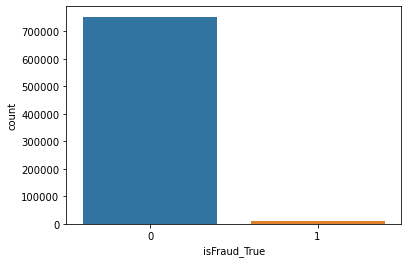

4. If given more time, I wish to perform clustering analysis to cluster customers into groups by features, and see if each groups have different fraud rate and prediction accuracy. 
